### Problem Statement : Predict  why the decline of the viewership happenned and what went wrong.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
dataframe=pd.read_csv("mediacompany.csv")
dataframe=dataframe.drop("Unnamed: 7",axis=1)

In [3]:
dataframe.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [4]:
dataframe.dtypes

Date                   object
Views_show              int64
Visitors                int64
Views_platform          int64
Ad_impression           int64
Cricket_match_india     int64
Character_A             int64
dtype: object

In [5]:
dataframe.Date=pd.to_datetime(dataframe.Date)

In [6]:
dataframe.dtypes

Date                   datetime64[ns]
Views_show                      int64
Visitors                        int64
Views_platform                  int64
Ad_impression                   int64
Cricket_match_india             int64
Character_A                     int64
dtype: object

In [7]:
# Deriving "Days" from started days
from datetime import date

d0=pd.to_datetime("2017/02/28")
d1=dataframe.Date
d2=d1- d0
dataframe["days"]=d2


In [8]:
dataframe.head(14)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6 days
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,7 days
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,8 days
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,9 days
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,10 days


In [9]:
# cleaning Days:
#dataframe.days


In [10]:
#dataframe.days
dataframe.days=dataframe.days.astype("str")
dataframe.days=dataframe.days.map(lambda x: x[0:2])
dataframe.days=dataframe.days.astype("int64")
dataframe.dtypes
dataframe.days.tail()

75    76
76    77
77    78
78    79
79    80
Name: days, dtype: int64

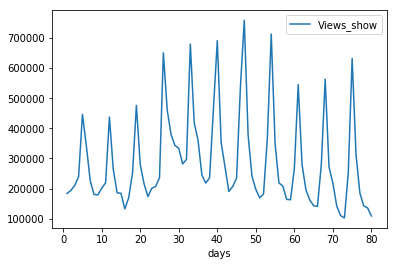

In [11]:
dataframe.plot.line(x='days',y="Views_show")
plt.show()

Analysis:
Here we can the data is steep at the weekends and firstly the graph increases and then decreases

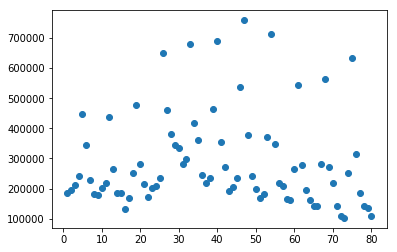

In [12]:
plt.scatter(dataframe.days,dataframe.Views_show)
plt.show()

<a href="http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/DataPresentation/DataPresentation7.html">Detail INformation on uses of graph</a>

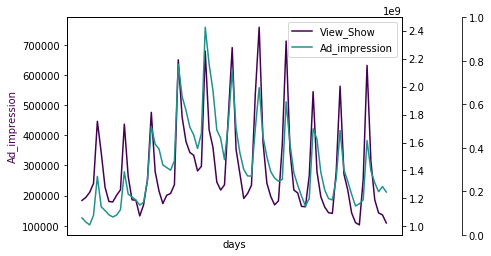

In [13]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
subplot = fig.add_subplot(111)

par1 = subplot.twinx()
par2 = subplot.twinx()

subplot.set_xlabel("days")
subplot.set_ylabel("View_Show")
subplot.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = subplot.plot(dataframe.days,dataframe.Views_show, color=color1,label="View_Show")
p2, = par1.plot(dataframe.days,dataframe.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
subplot.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

subplot.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')


In [14]:
# Derived Metrics 
# weekdays are taken as 1 = sunday and 7 = saturday
dataframe["weekday"]=(dataframe.days+3)%7
dataframe.weekday.replace(0,7,inplace=True)
dataframe.weekday=dataframe.weekday.astype(int)
dataframe.head()
#dataframe.dtypes

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


## Creating a first Model

In [15]:
X=dataframe[["Visitors","weekday"]]
Y=dataframe["Views_show"]

In [16]:
lm1=LinearRegression()
lm1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
lm1.coef_

array([ 2.78681183e-01, -3.59083501e+04])

In [18]:
lm1.intercept_

-38615.11278656882

In [19]:
# using statsmodel to see the summary
import statsmodels.api as sm

X=sm.add_constant(X)
lm_1=sm.OLS(Y,X).fit()

In [20]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           8.01e-12
Time:                        01:19:46   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [21]:
# Considering only weekends value and assigning 1 to sat,sun and 0 to rest of days.
def cond(i):
    
    if i % 7==4:
        return 1
    elif i % 7==5:
        return 1
    else:
        return 0
    
dataframe["weekend"]=[cond(i) for i in dataframe.days] 

In [22]:
dataframe.head()


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


## Creating 2nd model

In [23]:
X=dataframe[["weekend","Visitors"]]
Y=dataframe["Views_show"]
X=sm.add_constant(X)

lm_2=sm.OLS(Y,X).fit()
print(lm_2.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           2.51e-12
Time:                        01:19:46   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

## Creating 3rd Model

In [24]:
X=dataframe[["Visitors","weekend","Character_A"]]
Y=dataframe["Views_show"]

X=sm.add_constant(X)
lm_3=sm.OLS(Y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           1.53e-14
Time:                        01:19:47   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [25]:
# Creating LAg Variables
dataframe["Lag_Views"]=np.roll(dataframe["Views_show"],1)
dataframe.Lag_Views.replace(108961,0,inplace=True)

In [26]:
dataframe.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


## Creating Fourth MOdel

In [27]:
X=dataframe[["Visitors","Character_A","weekend","Lag_Views"]]
Y=dataframe["Views_show"]

X=sm.add_constant(X)
lm_4=sm.OLS(Y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           3.16e-21
Time:                        01:19:47   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

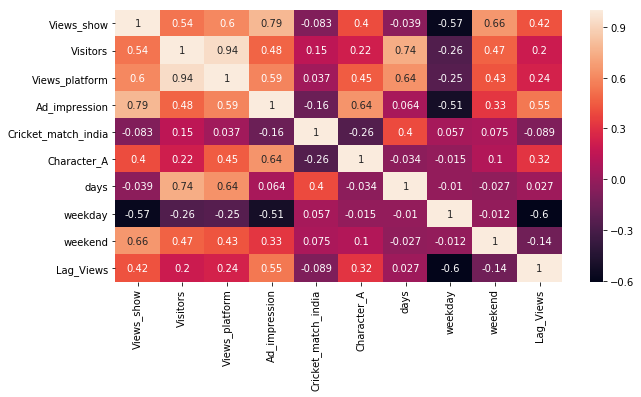

In [28]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(dataframe.corr(),annot=True)

## Creating 5th Model

In [29]:
X=dataframe[["weekend","Character_A","Views_platform"]]
Y=dataframe["Views_show"]

X=sm.add_constant(X)
lm_5=sm.OLS(Y,X).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           3.59e-15
Time:                        01:19:49   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

## Creating 6th model

In [30]:
dataframe.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


In [31]:


X = dataframe[['weekend','Character_A','Visitors']]

# Putting response variable to y
Y = dataframe['Views_show']

X=sm.add_constant(X)
lm_6=sm.OLS(Y,X).fit()
print(lm_6.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           1.53e-14
Time:                        01:19:50   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

## Creating 7th model

In [32]:
X=dataframe[["Visitors","Character_A","weekend","Ad_impression"]]
Y=dataframe["Views_show"]

X=sm.add_constant(X)
lm_6=sm.OLS(Y,X).fit()
print(lm_6.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           1.10e-25
Time:                        01:19:50   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

In [33]:
dataframe["Ad_impression_millions"]=dataframe.Ad_impression/100000

Creating 8th model 

In [34]:
X=dataframe[["weekend","Character_A","Ad_impression_millions"]]
X=sm.add_constant(X)
lm_8=sm.OLS(Y,X).fit()
print(lm_8.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 11 Jul 2019   Prob (F-statistic):           1.05e-26
Time:                        01:19:50   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.66

In [35]:
predicted_views=lm_8.predict(X)

In [36]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(dataframe.Views_show,predicted_views)
r_squared=r2_score(dataframe.Views_show,predicted_views)



In [37]:
print("Mean_Square_error",mse)
print("r_square_value",r_squared)

Mean_Square_error 4677651616.253408
r_square_value 0.802643446857565


## Verfication MODEL

In [38]:
# actual Vs Predicted Score

In [39]:
c=[i for i in range(1,81,1)]
print(c)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


Text(0,0.5,'Views')

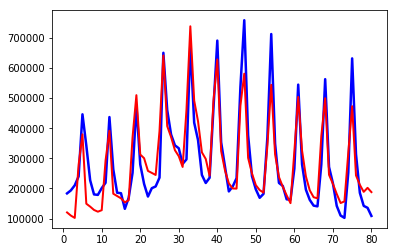

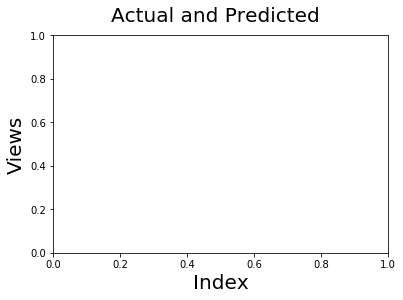

In [40]:
#plt.figure()
plt.plot(c,dataframe.Views_show,color="blue",linewidth=2.5,linestyle="-")
plt.plot(c,predicted_views,color="red",linewidth=2,linestyle="-")
plt.figure().suptitle("Actual and Predicted",fontsize=20)
plt.xlabel("Index",fontsize=20)
plt.ylabel("Views",fontsize=20)




Text(0,0.5,'Views_show-Predicted_views')

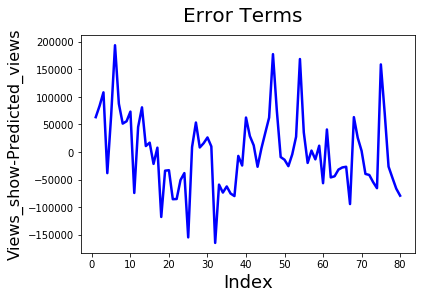

In [41]:
fig = plt.figure()
plt.plot(c,dataframe.Views_show-predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label